In [9]:
import numpy as np
import matplotlib.pyplot as plt

In [10]:

# Définition d'une fonction pour lire les vecteurs d'entrée et de sortie à partir d'un fichier texte
def lire_donnees(nom_fichier):
    with open(nom_fichier, 'r') as f:
        lignes = f.readlines()
    x = []
    y = []
    for ligne in lignes:
        donnees = ligne.strip().split(',')
        x.append([float(donnees[i]) for i in range(len(donnees) - 1)])
        y.append(float(donnees[-1]))
    return np.array(x), np.array(y)


In [11]:

# Définition de la fonction du gradient
def gradient(X, y, theta):
    m = len(y)  # Nombre de données d'entraînement
    gradient = (1 / m) * (X.T @ X @ theta - X.T @ y) # Formule du gradient de la fonction de coût
    return gradient


In [12]:
# Définition de la fonction de coût
def fonction_cout(X, y, theta):
    m = len(y)  # Nombre de données d'entraînement
    cout = np.sum(np.square(X @ theta - y)) / (2 * m) # Formule de la fonction de coût
    return cout


In [13]:
# Définition de la fonction de descente de gradient
def descente_gradient(X, y, theta, alpha, nb_iterations_max):
    historique_erreur = []
    for i in range(nb_iterations_max):
        theta -= alpha * gradient(X, y, theta)  # Mise à jour des coefficients du modèle
        erreur = fonction_cout(X, y, theta)  # Calcul de l'erreur
        historique_erreur.append(erreur)
    return theta, historique_erreur


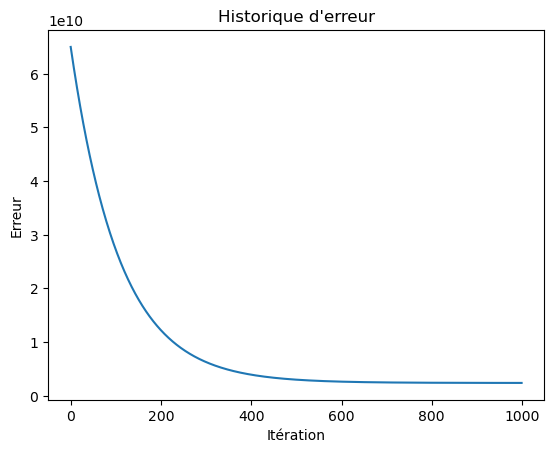

[8.04418226e-02 1.63772062e+02 2.53137483e-01]


In [6]:
# Lecture des vecteurs d'entrée et de sortie à partir d'un fichier texte
x, y = lire_donnees('ex1data2.txt')

# Ajout d'une colonne de 1 aux données d'entrée pour représenter le terme constant dans le modèle
X = np.column_stack((np.ones(len(x)), x))

# Définition du taux d'apprentissage initial et du nombre maximum d'itérations
alpha = 0.000000001
nb_iterations_max = 1000

# Initialisation des coefficients du modèle de régression linéaire à zéro
theta = np.zeros(X.shape[1])

# Appel de la fonction de descente de gradient pour calculer les coefficients du modèle de régression linéaire
theta, historique_erreur = descente_gradient(X, y, theta, alpha, nb_iterations_max)

# Tracé de l'historique d'erreur
plt.plot(range(len(historique_erreur)), historique_erreur)
plt.title('Historique d\'erreur')
plt.xlabel('Itération')
plt.ylabel('Erreur')
plt.show()
print(theta)

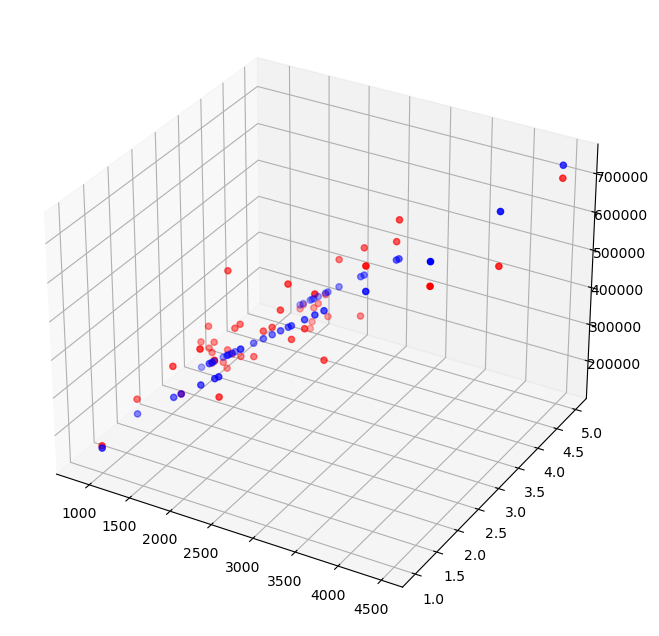

In [8]:
fig = plt.figure(figsize=(10,8))
ax = fig.add_subplot(111, projection = '3d')
ax.scatter(X[:, 1],X[:, 2], y, c='r', marker='o')
ax.scatter(X[:, 1],X[:, 2], np.dot(X, theta), c='b', marker='o')
#plt.plot(X[:, 1], np.dot(X, theta), 'b')
plt.show()